In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data Set

In [43]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Data Exploration

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [46]:
from sklearn.model_selection import train_test_split

#X is dataframe without target variable
#since we are dropping a col, hence with use axis equal to 1
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

print(f'feature:\n{X.head()}')
print('===============================================')
print(f'value:\n{y.head()}')

feature:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY  
value:
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [48]:
train_df = X_train.join(y_train)
#join the shuffled data so that we can check the correlation
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

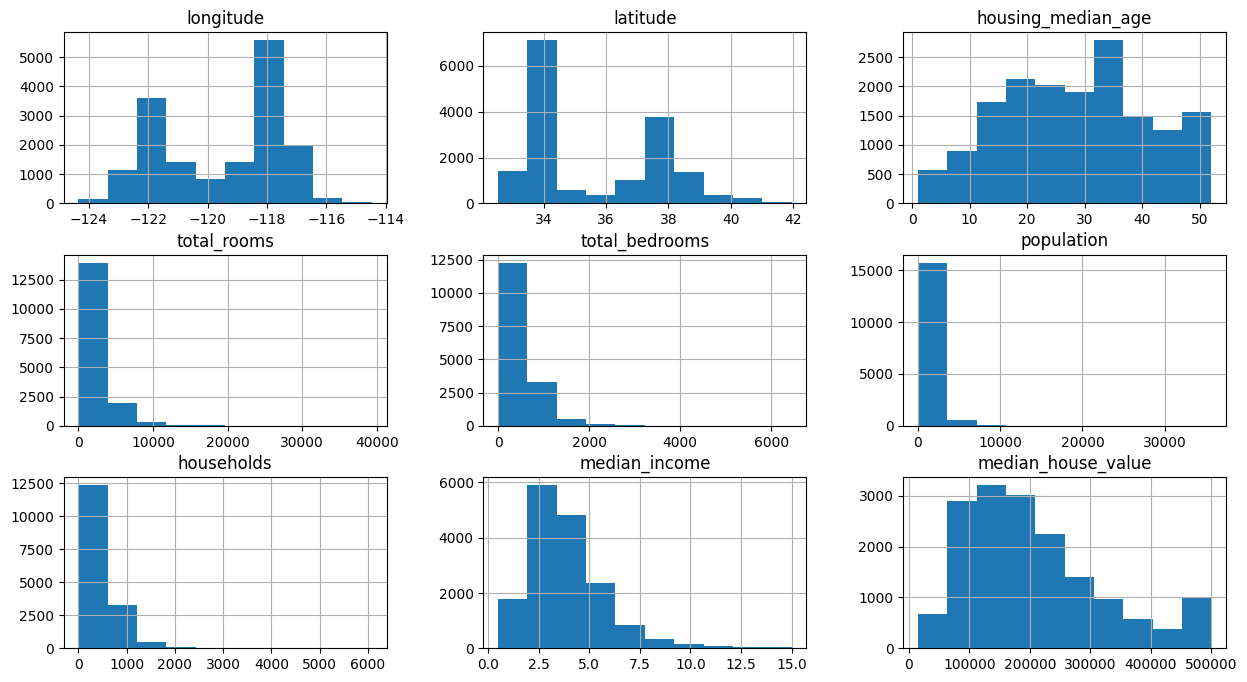

In [49]:
train_df.hist(figsize=(15,8))

<Axes: >

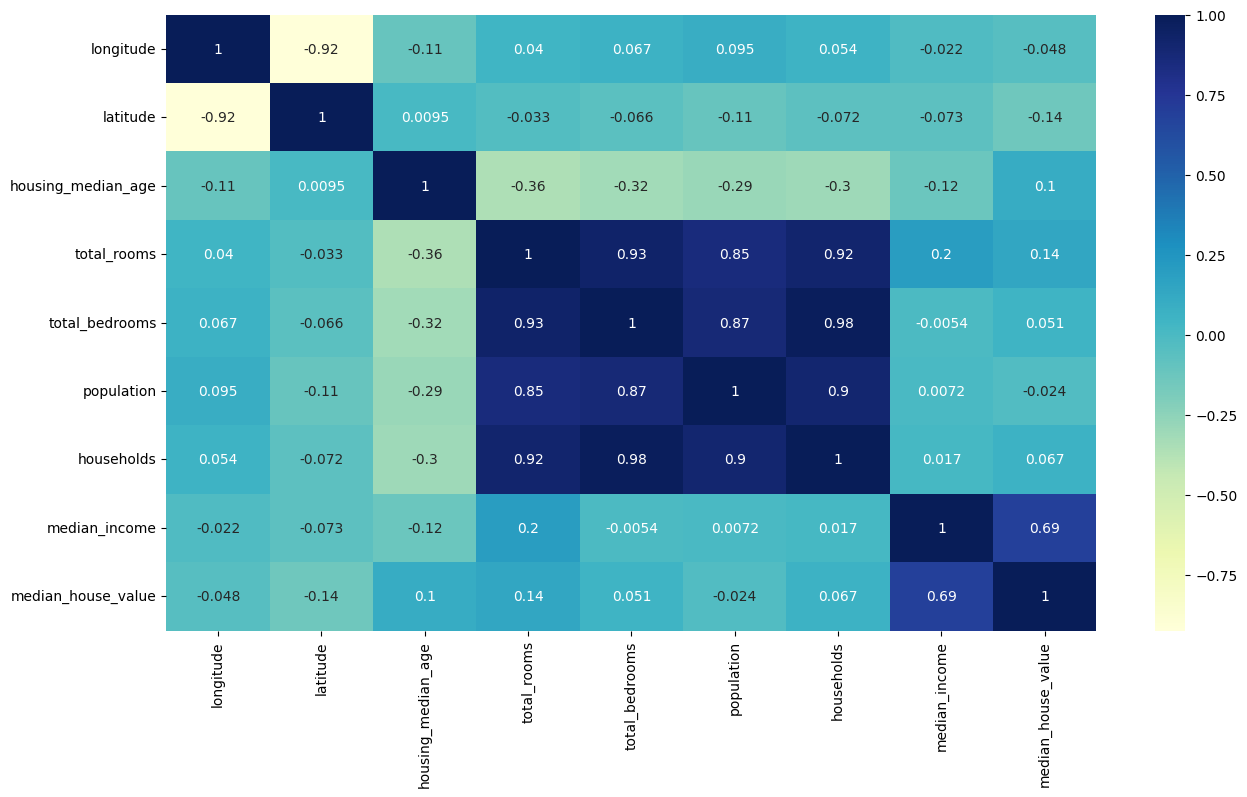

In [50]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

## Data Preprocessing
Note that some data are right skewed, hence we might take log for these data

In [51]:
train_df['total_rooms'] = np.log(train_df['total_rooms']+1)
train_df['total_bedrooms'] = np.log(train_df['total_bedrooms']+1)
train_df['population'] = np.log(train_df['population']+1)
train_df['households'] = np.log(train_df['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

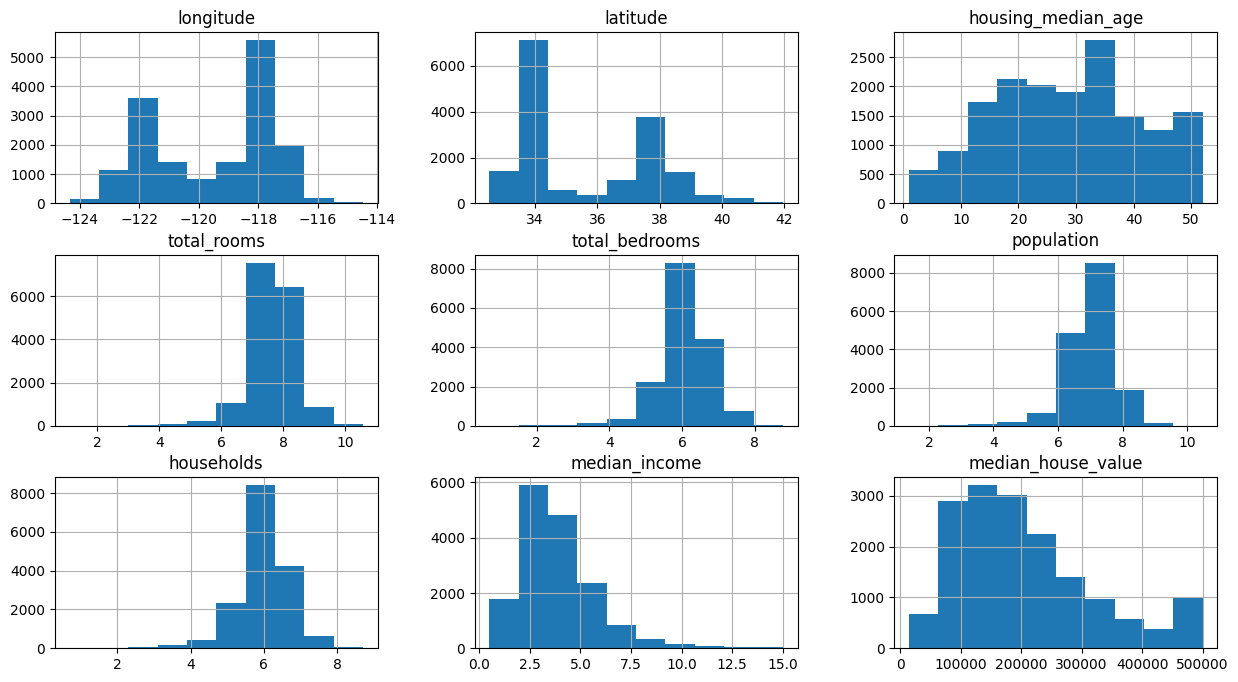

In [52]:
train_df.hist(figsize=(15, 8))

The distributions look better now for model training later

We consider non numeric column, 'ocean_proximity' as houses closer to the coast might have higher prices which is a more desireable area, while inland has a more lower price (by assumption). 
Then we should use one hot encoder

In [53]:
train_df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [54]:
train_df = train_df.join(pd.get_dummies(train_df['ocean_proximity'],dtype=int)).drop(['ocean_proximity'], axis=1) 
'''
since we have a dummy data, then we drop the column for the non numeric value
Set dtype to int, if not will return True/False which cant be used for correlation heatmap
'''

'\nsince we have a dummy data, then we drop the column for the non numeric value\nSet dtype to int, if not will return True/False which cant be used for correlation heatmap\n'

now we check the correlation after one hot encoder with ocean proximity

<Axes: >

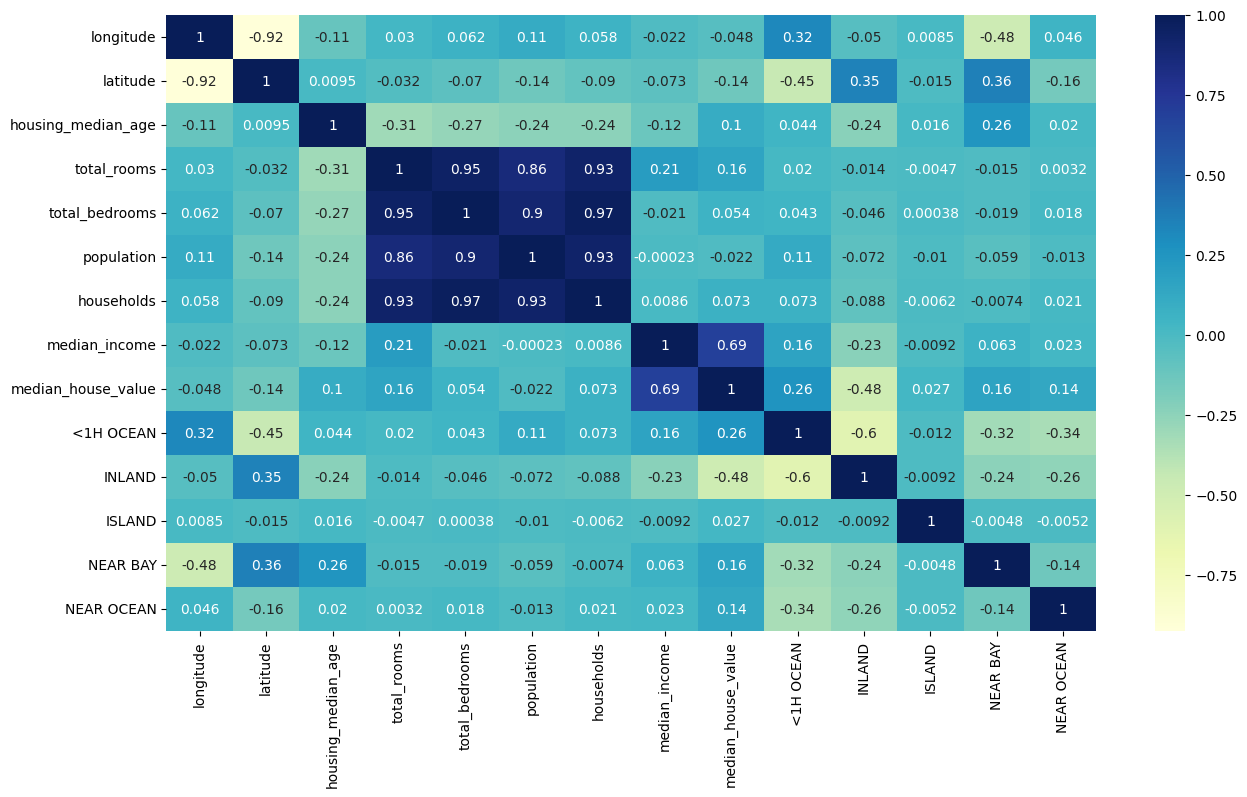

In [55]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

We can see that inland has negative correlation with respect to 'median house value' 

So if you are inland you are paying lower price compare to not inland

Where '<1 hr ocean' is having positive correlation suggested house owner is paying at higher price

let's visualize the coordinate, to see how different location (inland or near ocean etc.) influence the prices

<Axes: xlabel='latitude', ylabel='longitude'>

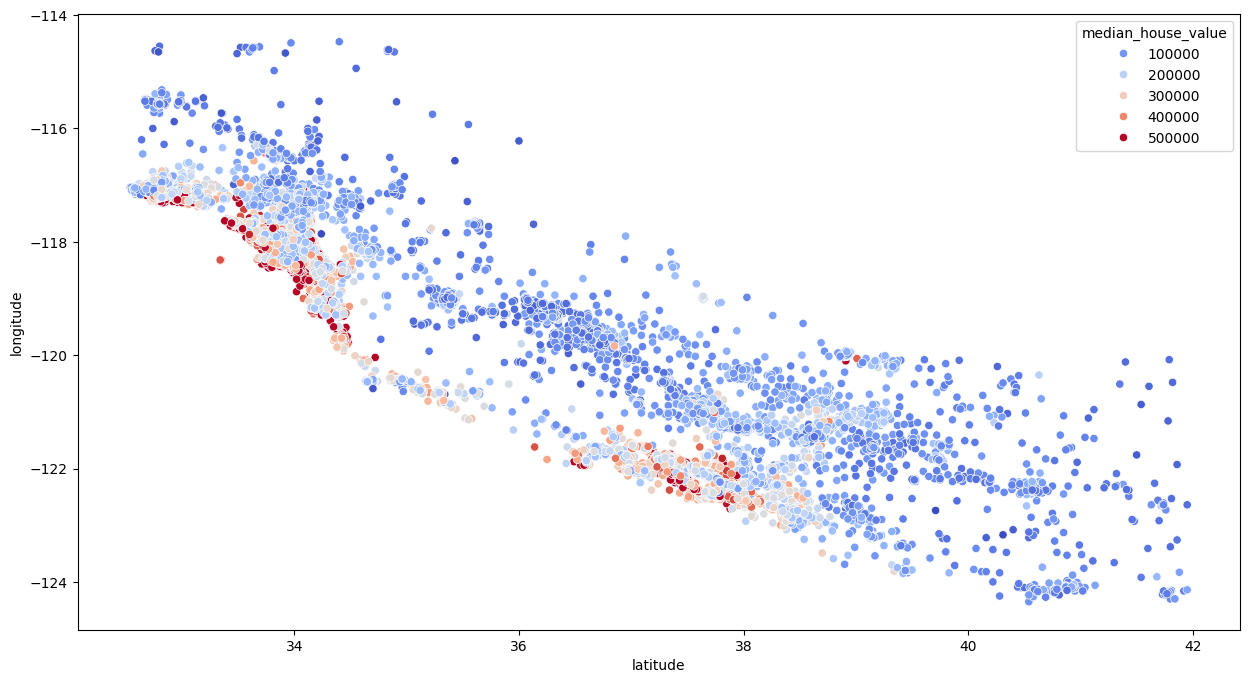

In [56]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_df, hue='median_house_value', palette='coolwarm')

## Feature Engineering

<Axes: >

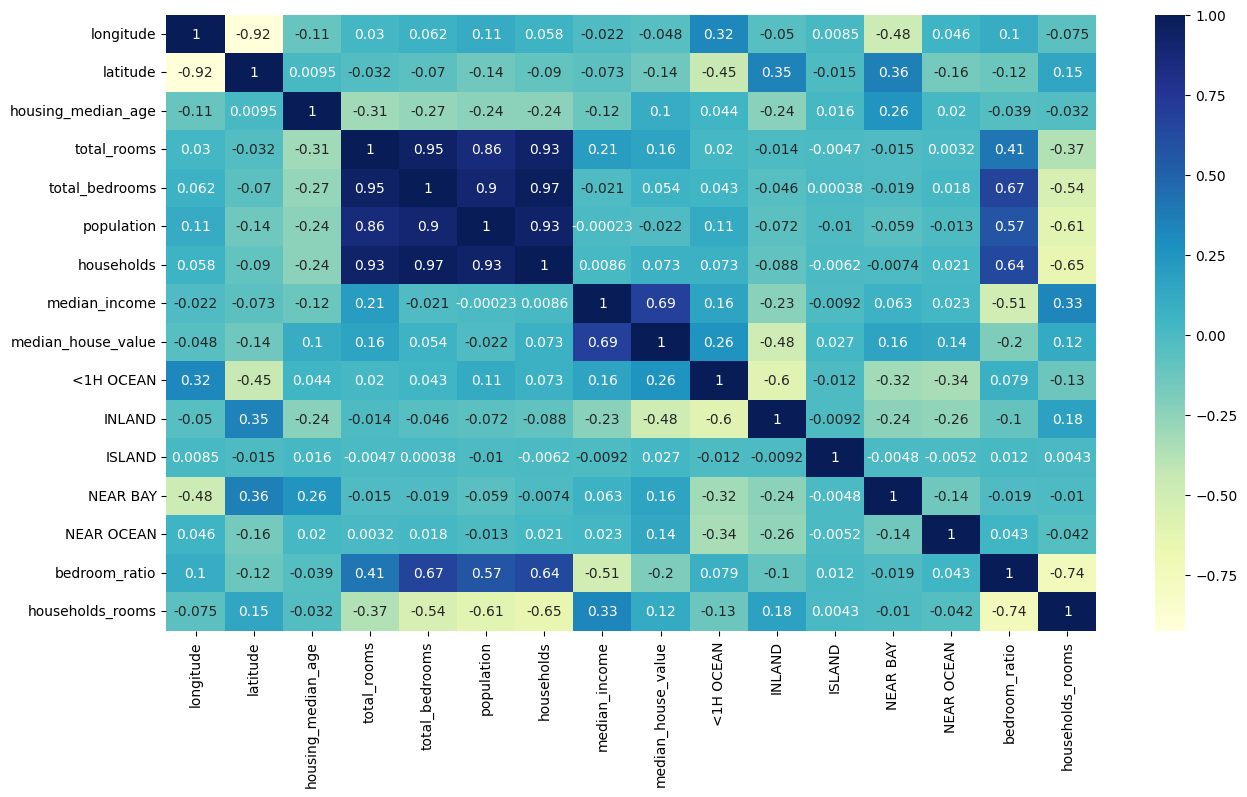

In [57]:
train_df['bedroom_ratio'] = train_df['total_bedrooms'] / train_df['total_rooms']
train_df['households_rooms'] = train_df['total_rooms'] / train_df['households'] 
#normally more house hold has more rooms, we will verify this with correlationship heatmap

plt.figure(figsize=(15, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

from the heatmap above,
the two new features seems to have more obvious correlation with the target variable compare to the original one,
hence we have engineered something more interesting that the 'houshold' itself with respect to our target variable 'median_house_value'

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#do train test split again as we have updated the dataframe
X_train, y_train = train_df.drop(['median_house_value'], axis=1), train_df['median_house_value']

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [59]:
test_df = X_test.join(y_test)

test_df['total_rooms'] = np.log(test_df['total_rooms'] +1)
test_df['total_bedrooms'] = np.log(test_df['total_bedrooms']+1)
test_df['population'] = np.log(test_df['population']+1)
test_df['households'] = np.log(test_df['households']+1)

#test_df = test_df.join(pd.get_dummies(test_df['ocean_proximity'], dtype=int)).drop(['ocean_proximity'], axis=1)
test_df = test_df.join(pd.get_dummies(test_df['ocean_proximity'],dtype=int)).drop(['ocean_proximity'], axis=1) 

test_df['bedroom_ratio'] = test_df['total_bedrooms'] / test_df['total_rooms']
test_df['households_rooms'] = test_df['total_rooms'] / test_df['households']

X_test, y_test = test_df.drop(['median_house_value'], axis=1), test_df['median_house_value']

test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,245800.0,0,0,0,0,1,0.819799,1.239612
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,137900.0,0,1,0,0,0,0.800760,1.276748
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,218200.0,1,0,0,0,0,0.820690,1.229934
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,220800.0,0,0,0,1,0,0.787715,1.321504
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,170500.0,0,1,0,0,0,0.832130,1.252273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,7.978311,6.666957,7.076654,6.620073,3.5985,500001.0,0,0,0,0,1,0.835635,1.205170
6274,-117.95,34.03,33.0,7.486053,5.978886,7.325149,5.932245,3.3389,157900.0,1,0,0,0,0,0.798670,1.261926
2997,-119.03,35.32,12.0,7.909122,6.309918,7.166266,6.261492,2.5575,100200.0,0,1,0,0,0,0.797803,1.263137
13440,-117.42,34.08,28.0,7.741099,6.040255,7.180070,6.098074,3.4844,127700.0,0,1,0,0,0,0.780284,1.269433


In [60]:
model.score(X_test, y_test)

0.6687407117584973